# Tarea 3 -  COM4001 Minería de Datos
## Profesor: Luis Cossio.
## Ayudante: Luis Miranda.
---

- Nombre: Felipe Coliman, Fabián Ayala
- Fecha de Entrega: 08-06-2024


## Objetivos:

* Uso de notebooks de Python y entrega de informes basados en esta herramienta.
* Uso de modelos de aprendizaje supervisado y técnicas de selección de características.
* Uso de estos modelos para hacer clasificación Multiclase.
* Implementar modelos de Redes Neuronales para el problema multiclase.
* Análisis de métricas de desempeño, comparación y selección del mejor modelo en base a los resultados.
* Análisis del impacto al realizar Reduccion de Dimensionalidad.

## Instrucciones:

* La tarea a realizar se debe presentar en grupos de **2 personas**, cualquier copia o plagio será sancionada con nota 1.0 a todos los involucrados y con posible sumario.
* La tarea consiste en entrenar y probar diferentes modelos de clasificación multiclase, para luego probar sus desempeños con métricas especificas, para finalmente seleccionar el mejor modelo y configuración de este, además se debe usar técnicas de selección de caracteristicas para luego usar estos nuevos datos en el mejor modelo. Las soluciones en código y las interpretaciones de resultados deben ir en el mismo notebook donde se va creando el informe y serán evaluadas.
* La tarea debe contener una sección de discusión, conclusión y selección del mejor modelo, en base a los resultados obtenidos, sientase libre de explayarse profundamente en este punto.
* Se debe agregar una sección de referencias al final de la tarea.
* Para la presentación final de la tarea se debe subir su notebook Python en formato .ipynb


# Parte 1: Marco Teórico
Investigue y entregue una definición para los siguientes conceptos:

- **Clasificador Multiclase**: Es un modelo de machine learning que puede asignar una instancia de entrada a una de tres o más clases posibles. Un ejemplo de los clasificadores multiclase, es clasificar tipos de animales(perros, gatos, pajaros) o categorías de productos en un supermercado.

- Describa el funcionamiento de los siguientes clasificadores, enfocado en como se utilizan en clasificación multiclase, mencione aspectos matematicos importantes como formulas o reglas de decision:
  - **Naive Bayes Multiclase:** El Clasificador Naive Bayes se basa en el teorema de Bayes, para calcular las probabilidades posteriores dadas las probabilidades previas y la probabilidad condicional. Asumimos que todos los atributos son independientes entre sí. Cuando hablamos de multiclase en este clasificador nos referimos a que utiliza el teorema de Bayes para cada clase posible y la clase con mayor probabilidad se asigna como la clase de instancia.


  - **Random Forest:** Es un algoritmo de Ensemble Learning que utiliza múltiples árboles de decisión para mejorar la precisión y evitar el sobreajuste. Cada árbol de decisión se entrena con un subconjunto aleatorio del conjunto de datos y de las características. Estos árboles se
entrenan de forma independiente, lo que aumenta la diversidad y robustez del modelo.


  - **Perceptron Multicapa:** Es un tipo de red neuronal que utiliza el aprendizaje automático, está diseñada para reconocer patrones complejos y tomar decisiones en base a estos patrones.
  
    - **Defina Capa de entrada, salida y ocultas:**

    -Capa de entrada: Es la primera  etapa de nuestra red neuronal. Aqui es donde ingresamos los datos a nuestro modelo.

    -Capa oculta: Estas son las capas intermedias entre la capa de entrada y la capa de salida. Son llamadas ocultas porque no vemos directamente como funcionan internamente.

    -Capa de salida: Esta es la capa final que nos entrega la respuesta del modelo tras haber procesado toda la información a través de las capas ocultas.

    - **Defina Pesos y bias:**
    
     Los **pesos** son los valores que multiplican las conexiones entre las neuronas. Cada conexión entre dos neuronas tienen un peso asociado.

     La **bias** lo podemos definir como un término adicional que se suma a la entrada ponderada de una neurona antes de aplicar la función de activación. Por lo tanto, permite que el modelo se ajuste mejor a la salida.

    
  - **Defina Función de activación. Funciones Sigmoid, Relu.**

  La **función de activación** básicamente decide si nuestra neurona se activa o no. Es una función matemática que se aplica a la salida de la neurona.

    **Función Sigmoid:** Convierte el input en un valor entre 0 y 1. Es útil sobre todo cuando la salida debe ser una probabilidad.

    **Función ReLU:** Convierte cualquier entrada negativa en 0, y deja las entradas positivas tal como están.



- **Explique que es y para que sirve la curva de perdida `loss_curve`.**

La curva de pérdida es un gráfico que muestra cómo cambia el error o perdida de un modelo a lo largo del tiempo durante su entrenamiento. Esta pérdida es una medida de cuán mal está prediciendo el modelo en comparación con los datos reales.

La loss_curve nos sirve para tener un monitoreo del entrenamiento, podemos detectar el sobreajuste, como también ajustar los hiperparámetros para un mejor funcionamiento de este.


Reducción de dimensionalidad. (Explique en que consiste, mencionando aspectos matematicos relacionados a esta técnica)

  - La **reducción de dimensionalidad** es una técnica en el análisis de datos cuyo objetivo es reducir el número de variables de un conjunto de datos mientras se retiene la mayor cantidad posible de información importante.


  - **PCA:** Es una tecnica de reducción de la dimensionalidad que
busca transformar los datos en un espacio de menor dimensión
mientras se conserva la mayor cantidad posible de información, PCA se utiliza comunmente como una técnica previa al
Clustering para reducir la complejidad del dataset.



In [ ]:
from google.colab import drive;
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #Importamos accuracy para el final de la tarea
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Parte 2.0 Cargar Datos

Esta primera parte consiste en cargar a los datos a utilizar. Se  utilizará  la  base  de  datos  Dataset  for  Sensorless  Drive  Diagnosis  Data  Set, que es una base de datos tomadas del UC Irvine Machine Learning Repository. Contiene 48 características extraídas de la señal de corriente que alimenta a un motor síncrono.  Hay 11 clases.  Se entregará un subconjunto de la base de datos original debido a su gran tamaño.
- Se le entregarán dos archivos con los datos a traves de ucampus:
    - sensorless_test.txt
    - sensorless_train.txt

Puede notar que se les entrega directamente los datos para Prueba y Entrenamiento, dentro de estos archivos, la ultima columna corresponden a las etiquetas, usted debe dividir la columna de las etiquetas y guardarlas en una variable para cada archivo: y_test, y_train desde sensorless_test y sensorless_train respectivamente y luego eliminarlas del conjunto de datos originales.

Finalmente deberia obtener 4 subconjuntos de datos:
- X_test: Archivo sensorless_test sin la ultima columna de etiquetas.
- X_train: Archivo sensorless_train sin la ultima columna de etiquetas.
- y_test: Columna de etiquetas obtenidas desde sensorless_test.
- y_train: Columna de etiquetas obtenidas desde sensorless_train.

Puede usar la funcion `pd.read_csv` con el parametro `header = None`.

In [ ]:
#Cargamos los datos de los Dataset entregados
X_test = pd.read_csv('/content/drive/My Drive/sensorless_test.txt', header = None)
y_test = X_test[48] # Etiquetas

del X_test[48] # Eliminamos la columna de las etiquetas


X_train = pd.read_csv('/content/drive/My Drive/sensorless_train.txt', header = None)
y_train = X_train[48] # Etiquetas

del X_train[48] # Eliminamos la columna de las etiquetas

## Parte 2.1 Estandarizacion de los Datos.
Para mejorar el rendimiento de nuestro modelo, es fundamental estandarizar las características de los datos. La estandarización transforma las características de tal manera que tengan una media de 0 y una desviación estándar de 1. Esto es especialmente importante para algoritmos como los perceptrones multicapa que son sensibles a la escala de los datos.

Instrucciones:
1. Utilice la función StandardScaler de la biblioteca scikit-learn para estandarizar los datos de entrenamiento y prueba.
2. Aplique el escalador (scaler) ajustado en el conjunto de entrenamiento a los datos de prueba.

In [ ]:
# Crear el escalador y ajustarlo a nuestros datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Guardar los datos estandarizados en archivos CSV
pd.DataFrame(X_train_scaled).to_csv('X_train_scaled.csv', index=False, header=False)
pd.DataFrame(X_test_scaled).to_csv('X_test_scaled.csv', index=False, header=False)

## Parte 2.2 Funcion para Calcular métricas de Desempeño:
Cree una funcion que permita calcular las metricas de desempeño para los clasificadores multiclase, esta funcion debe recibir como parametros las etiquetas reales y las etiquetas predichas para cada clasificador, luego debe mostrar las siguientes metricas:
- Reporte de Clasificacion.
- Visualizacion de matriz de confusion (No basta mostrar la matriz solo con los valores, debe usar un metodo de visualizacion como HeatMap).

In [ ]:
import seaborn as sns

def evaluar_clasificador(y_real, y_pred):
    # Generar el reporte de clasificación
    print("Reporte de Clasificación:")
    print(classification_report(y_real, y_pred))

    # Generar la matriz de confusión
    matriz_confusion = confusion_matrix(y_real, y_pred)

    # Visualizar la matriz de confusión usando un heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='summer',linecolor='lightgreen',linewidths=0.01)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.show()

## Parte 2.3 Entrenamiento de Naive Bayes Multiclase:
Entrene un clasificador `GausianNB()` para clasificación de las clases. Luego muestre sus metricas de desempeño usando la funcion de la seccion 2.2.
- Analice los resultados obtenidos del reporte de clasificacion y de la matriz de confusion.





Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.93      0.82      0.87       161
           2       0.56      0.03      0.06       152
           3       0.90      0.92      0.91       155
           4       0.86      0.97      0.91       143
           5       0.62      0.82      0.71       153
           6       0.66      0.80      0.73       148
           7       1.00      1.00      1.00       154
           8       0.94      0.49      0.65       150
           9       0.77      0.75      0.76       171
          10       0.49      0.98      0.66       139
          11       1.00      0.99      0.99       171

    accuracy                           0.78      1697
   macro avg       0.79      0.78      0.75      1697
weighted avg       0.80      0.78      0.75      1697



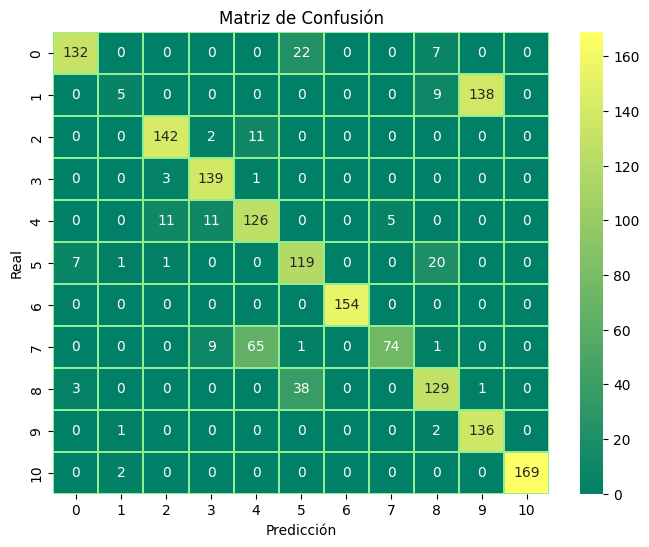

In [ ]:
# Cargar los datos estandarizados y las etiquetas
X_train_scaled = pd.read_csv('X_train_scaled.csv', header=None)
X_test_scaled = pd.read_csv('X_test_scaled.csv', header=None)

# Entrenar el clasificador GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train_scaled, y_train)

# Predecir las etiquetas para el conjunto de pruebas
y_pred = model_gnb.predict(X_test_scaled)

# Evaluar el clasificador usando la función que creamos
evaluar_clasificador(y_test, y_pred)

#Generamos el reporte del accuracy para el análisis final
accgnb = accuracy_score(y_test, y_pred)

**Analice los resultados obtenidos del reporte de clasificacion y de la matriz de confusion.**

Primero que nada cabe mencionar que las clases en el reporte de clasificación empiezan desde el **1**, y en cambio en la matriz de confusión comienza desde el **0**.

Podemos notar que la **clase 2** es la peor clasificada de todas, con una **precisión** de 0.56, un **recall** de 0.03 y un **f1-score** de 0.06. Esto puede ser por la cantidad tan baja de muestras disponibles para esta clase, y eso hace que el modelo no pueda detectar la clase correctamente, y cuando lo logra detectar estos casi siempre son falsos positivos. Viendo esto en la matriz de confusión podemos notar que la **clase 2** reconoce **138** datos como si fueran de la **clase 10**.

Otra clase que podemos diferenciar del resto, es la **clase 7** la cual presenta una clasificación perfecta en **precisión, recall y f1-score** con un 1.00. Esto es sumamente extraño, por lo tanto  deberiamos considerar esta clase a un problema de sobreajuste, donde el modelo únicamente puede producir datos con resultados singulares y con la imposibilidad de comprender nuevos datos de entrada. Esto visto en la matriz de confusión es como nos dice el reporte de clasificación, todos los datos de la **clase 7** son clasificados de la **clase 7**.

## Parte 2.4 Entrenamiento RandomForest:
Entrene un clasificador `RandomForestClassifier()` para la clasificacion de las clases, con `n_estimators = 1` y `random_state = 42`. Luego muestre sus métricas de desempeño usando la funcion de la seccion 2.2.
- Explique que significa que el parametro `n_estimators` sea asignado en 1 y sus implicaciones en el desempeño del clasificador.
- Analice los resultados obtenidos del reporte de clasificacion y de la matriz de confusion.


Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.74      0.73      0.73       161
           2       0.80      0.82      0.81       152
           3       0.87      0.89      0.88       155
           4       0.86      0.85      0.86       143
           5       0.72      0.78      0.75       153
           6       0.69      0.73      0.71       148
           7       0.98      0.99      0.99       154
           8       0.93      0.81      0.86       150
           9       0.82      0.82      0.82       171
          10       0.84      0.82      0.83       139
          11       0.98      0.97      0.97       171

    accuracy                           0.84      1697
   macro avg       0.84      0.84      0.84      1697
weighted avg       0.84      0.84      0.84      1697



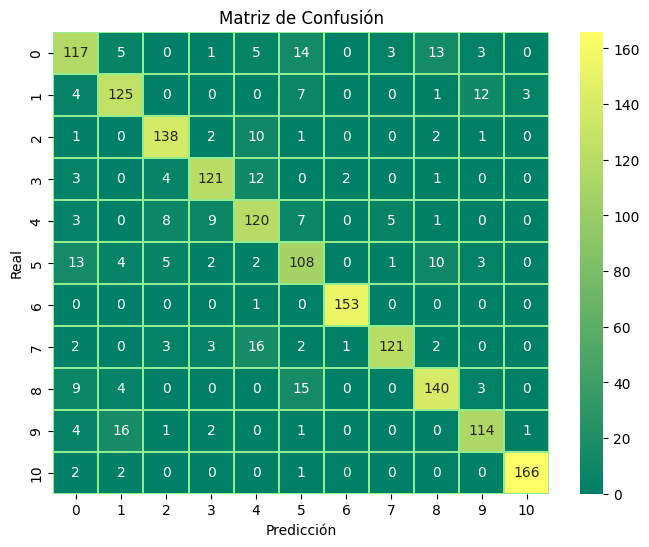

In [ ]:
# Cargar los datos estandarizados y las etiquetas
X_train_scaled = pd.read_csv('X_train_scaled.csv', header=None)
X_test_scaled = pd.read_csv('X_test_scaled.csv', header=None)

# Entrenar el clasificador RandomForestClassifier con n_estimators=1 y random_state=42
clasificador = RandomForestClassifier(n_estimators=1, random_state=42)
clasificador.fit(X_train_scaled, y_train)

# Predecir las etiquetas para el conjunto de pruebas
y_pred = clasificador.predict(X_test_scaled)

#Cargamos en nuestra función ya creada
evaluar_clasificador(y_test, y_pred)
#Generamos el reporte del accuracy para el análisis final
accrf = accuracy_score(y_test, y_pred)

**Explique que significa que el parametro n_estimators sea asignado en 1 y sus implicaciones en el desempeño del clasificador.**

Si nuestro parámetro **n_estimators** esta en uno, significa que solo vamos a tener un árbol de decisión, que sería básicamente como si fuera un clasificador simple de un árbol de decisión en vez de multiples árboles de decisión, entonces no estariamos aprovechando el clasificador de Random Forest como se debería.

Si tuvieramos que evaluar el **Desempeño** en **n_estimators=1** podemos decir que el rendimiento puede ser inferior comparado con un n_estimators más alto. Esto se debe a que Random Forest lo que hace es ir promediando los resultados de varios árboles de decisión, reduciendo así la varianza del modelo final.

Mencionando un punto de ventaja de **n_estimators=1**, es la **Interpretabilidad**, con un solo árbol, el modelo es mucho más fácil de interpretar. Podemos visualizar el árbol completo y notar como es que va realizando las decisiones.


**Analice los resultados obtenidos del reporte de clasificación y de la matriz de confusión.**

Respecto al reporte de clasificación podemos considerar que la clase peor evaluada fue la **clase 6** con una **precisión** de 0.69, un **recall** de 0.73 y un **f1-score** de 0.71. De todas formas estos resultados no son un resultado extremedamente bajo como en el caso del modelo de **Naive Bayes**.

Las clases mejor evaluadas son las **clases 7 y 11** con prácticamente una clasificación perfecta. Y esto lo más razonable es por la cantidad tan diminuta de muestras que posee, lo cual podía llevarnos a  un problema de sobreajuste igualmente, y para verificar este problema probé con **n_estimators** mayores y sí, prácticamente todas las clases me entregan un reporte de clasificación perfecto.



## Parte 2.5 Entrenamiento de Perceptron Multicapa

En esta sección, entrenará un perceptrón multicapa (MLP) utilizando diferentes configuraciones de activación y tamaños de la capa oculta. Probará tres tipos de funciones de activación ('relu', 'tanh', 'logistic') y tres tamaños diferentes para la capa oculta (10, 50 y 100 neuronas). El objetivo es evaluar el rendimiento del modelo en función de estas configuraciones.

Instrucciones:
1. Defina las listas de funciones de activación y tamaños de la capa oculta a probar.
2. Entrene el MLP para cada combinación de función de activación y tamaño de capa oculta con un maximo de 200 iteraciones.
3. Para cada configuracion, calcule la funcion de perdida `loss_curve` y guardelas en una variable.
4. Evalúe el modelo en el conjunto de prueba y almacene los resultados de la prediccion.
5. Muestre el reporte de clasificación, genere y visualice la matriz de confusión para cada configuración usando la funcion de la seccion 2.2.

Finalmente, usando las curvas de la funcion de perdida, muestre un gráfico de funcion perdida (loss) vs número de iteraciones (o épocas) durante entrenamiento. En un único gráfico incluya todas las configuraciones probadas.

- Analice los resultados obtenidos del grafico de la funcion de perdida (loss) vs numero de iteraciones de las diferentes configuraciones, responda:
    1. ¿Cual configuracion converge mas rapido y cual converge mas lento?
    2. ¿Cual configuracion obtuvo la perdida mas baja en la ultima iteracion (iter 200)?

- Analice los resultados obtenidos del reporte de clasificacion y de la matriz de confusion, responda:
    1. ¿Cual configuracion obtuvo el mayor Accuracy?
    2. ¿Cual configuracion obtuvo el menor Accuracy?
    3. ¿Que conclusiones puede obtener de las matrices de confusion? ¿Se ha hecho una buena clasificacion?
    4. Para cada funcion de activacion `['relu', 'tanh', 'logistic']` responda: ¿Que efectos tuvo aumentar la cantidad de neuronas en la capa oculta?

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación relu y tamaño de capa oculta 10...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.90      0.93      0.91       161
           2       0.86      0.86      0.86       152
           3       0.97      0.97      0.97       155
           4       0.89      0.96      0.92       143
           5       0.83      0.87      0.85       153
           6       0.82      0.78      0.80       148
           7       0.97      0.98      0.98       154
           8       0.94      0.83      0.88       150
           9       0.88      0.89      0.89       171
          10       0.86      0.87      0.87       139
          11       1.00      0.99      1.00       171

    accuracy                           0.90      1697
   macro avg       0.90      0.90      0.90      1697
weighted avg       0.90      0.90      0.90      1697



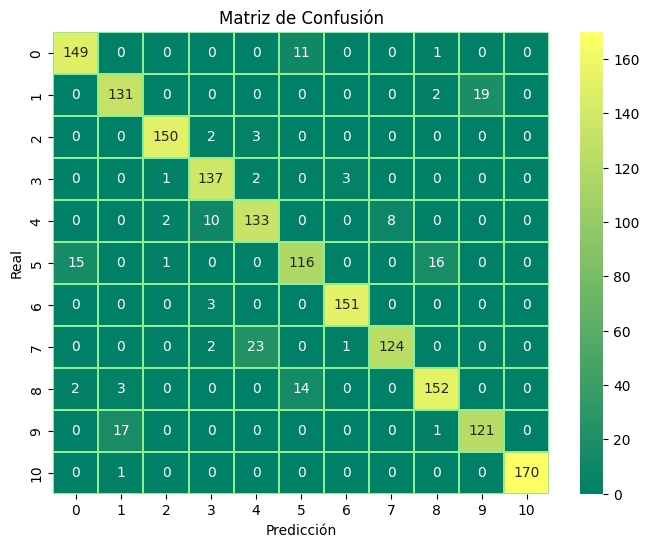

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación relu y tamaño de capa oculta 50...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       161
           2       0.92      0.88      0.90       152
           3       0.97      1.00      0.99       155
           4       0.97      0.97      0.97       143
           5       0.92      0.95      0.94       153
           6       0.92      0.95      0.93       148
           7       0.99      0.99      0.99       154
           8       0.97      0.93      0.95       150
           9       0.98      0.94      0.96       171
          10       0.87      0.92      0.90       139
          11       1.00      0.99      1.00       171

    accuracy                           0.96      1697
   macro avg       0.95      0.95      0.95      1697
weighted avg       0.96      0.96      0.96      1697



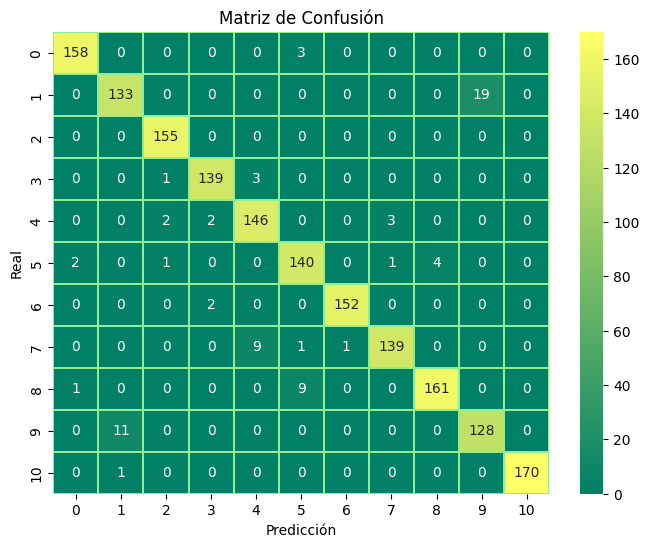

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación relu y tamaño de capa oculta 100...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       161
           2       0.93      0.91      0.92       152
           3       0.99      0.99      0.99       155
           4       0.95      0.98      0.97       143
           5       0.89      0.93      0.91       153
           6       0.91      0.93      0.92       148
           7       0.99      0.99      0.99       154
           8       0.96      0.89      0.93       150
           9       0.95      0.93      0.94       171
          10       0.90      0.95      0.93       139
          11       1.00      0.99      1.00       171

    accuracy                           0.95      1697
   macro avg       0.95      0.95      0.95      1697
weighted avg       0.95      0.95      0.95      1697



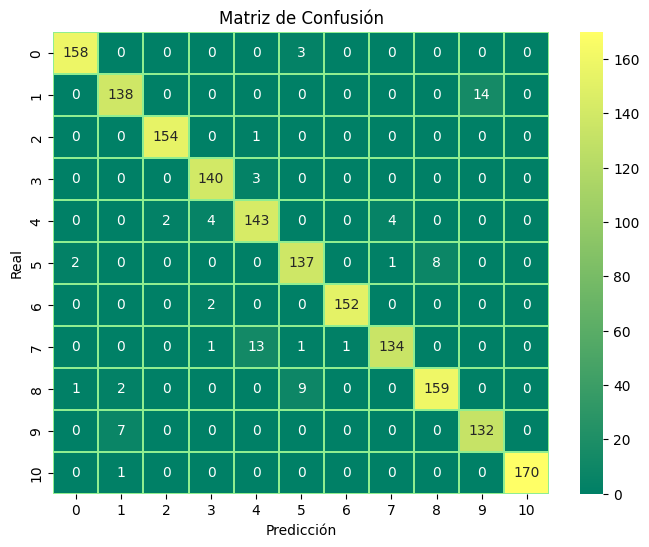

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación tanh y tamaño de capa oculta 10...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90       161
           2       0.89      0.81      0.85       152
           3       0.94      0.97      0.96       155
           4       0.87      0.98      0.92       143
           5       0.88      0.78      0.83       153
           6       0.81      0.79      0.80       148
           7       0.99      0.99      0.99       154
           8       0.92      0.87      0.90       150
           9       0.90      0.91      0.90       171
          10       0.83      0.90      0.86       139
          11       0.97      0.99      0.98       171

    accuracy                           0.90      1697
   macro avg       0.90      0.90      0.90      1697
weighted avg       0.90      0.90      0.90      1697



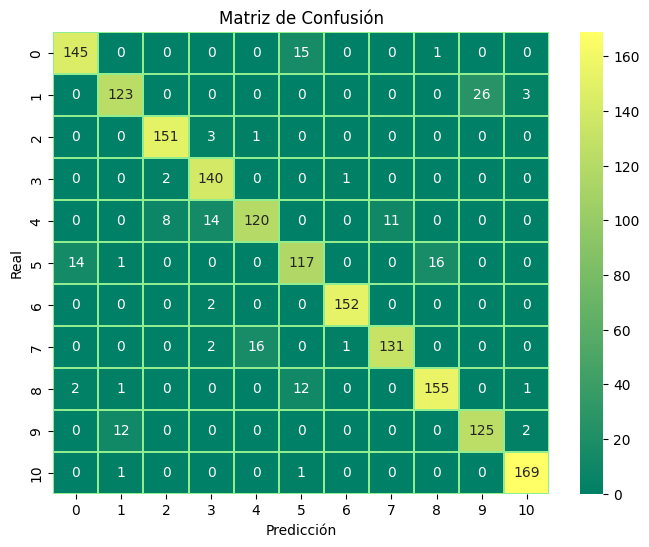

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación tanh y tamaño de capa oculta 50...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       161
           2       0.92      0.93      0.92       152
           3       0.96      0.99      0.97       155
           4       0.96      0.99      0.98       143
           5       0.95      0.91      0.93       153
           6       0.93      0.97      0.95       148
           7       0.99      0.99      0.99       154
           8       0.97      0.93      0.95       150
           9       0.96      0.95      0.96       171
          10       0.93      0.92      0.92       139
          11       1.00      0.99      1.00       171

    accuracy                           0.96      1697
   macro avg       0.96      0.96      0.96      1697
weighted avg       0.96      0.96      0.96      1697



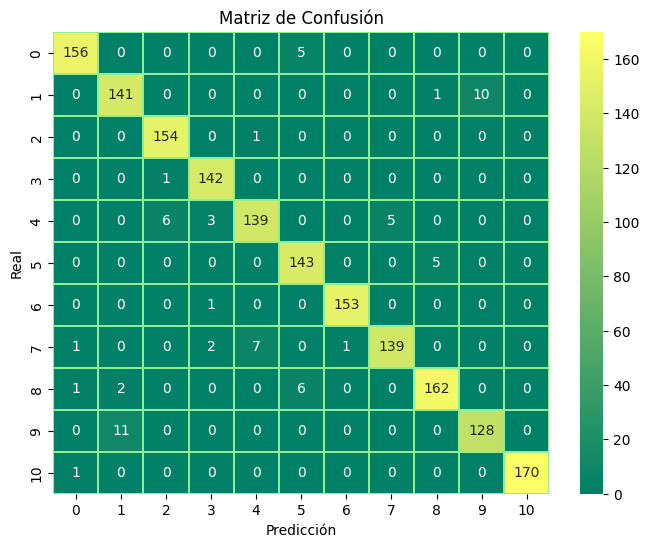

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación tanh y tamaño de capa oculta 100...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       161
           2       0.92      0.93      0.93       152
           3       0.96      0.99      0.98       155
           4       0.98      0.99      0.99       143
           5       0.96      0.94      0.95       153
           6       0.93      0.97      0.95       148
           7       0.99      1.00      1.00       154
           8       0.98      0.95      0.96       150
           9       0.98      0.94      0.96       171
          10       0.93      0.94      0.93       139
          11       1.00      1.00      1.00       171

    accuracy                           0.97      1697
   macro avg       0.97      0.97      0.97      1697
weighted avg       0.97      0.97      0.97      1697



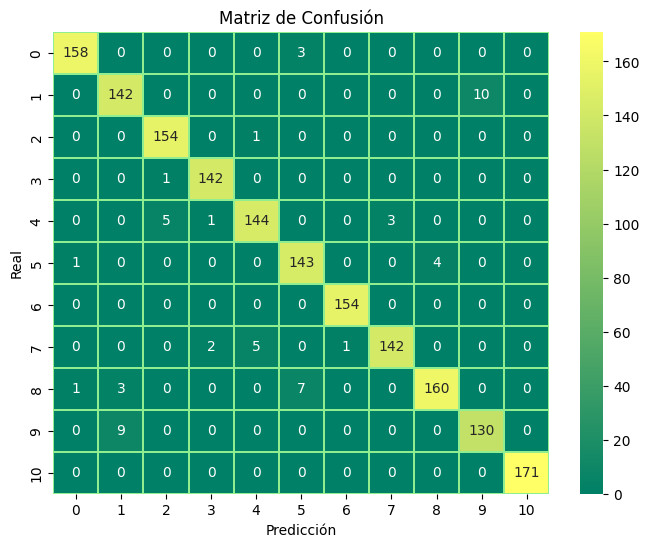

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación logistic y tamaño de capa oculta 10...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.78      0.91      0.84       161
           2       0.85      0.71      0.77       152
           3       0.89      0.88      0.89       155
           4       0.80      0.93      0.86       143
           5       0.82      0.72      0.77       153
           6       0.75      0.59      0.66       148
           7       0.96      0.99      0.97       154
           8       0.89      0.85      0.87       150
           9       0.84      0.87      0.86       171
          10       0.77      0.88      0.82       139
          11       0.97      0.98      0.97       171

    accuracy                           0.85      1697
   macro avg       0.85      0.85      0.84      1697
weighted avg       0.85      0.85      0.85      1697



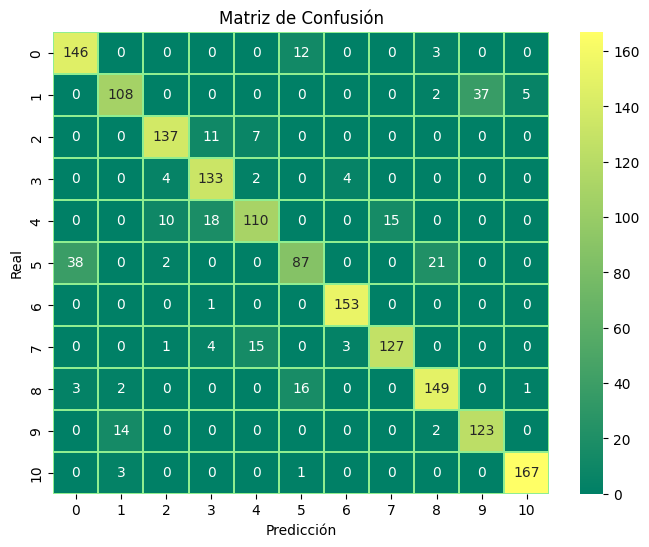

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación logistic y tamaño de capa oculta 50...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       161
           2       0.89      0.91      0.90       152
           3       0.93      0.95      0.94       155
           4       0.89      0.98      0.93       143
           5       0.89      0.82      0.85       153
           6       0.83      0.87      0.85       148
           7       0.99      0.99      0.99       154
           8       0.93      0.91      0.92       150
           9       0.92      0.87      0.89       171
          10       0.91      0.90      0.91       139
          11       1.00      0.99      1.00       171

    accuracy                           0.92      1697
   macro avg       0.92      0.92      0.92      1697
weighted avg       0.92      0.92      0.92      1697



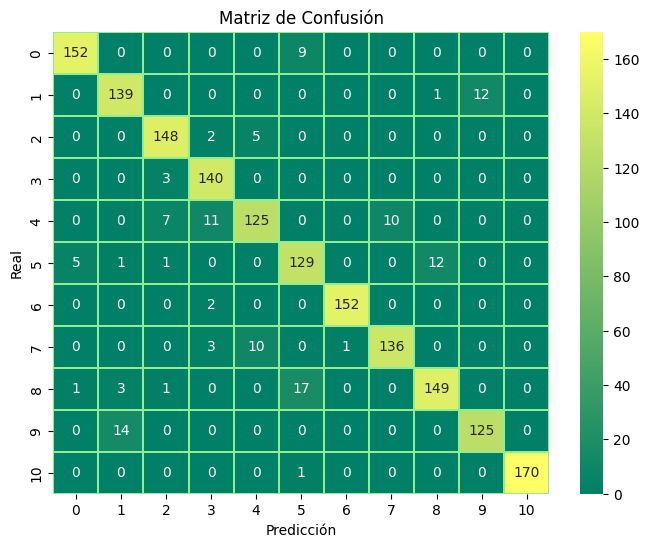

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando MLP con activación logistic y tamaño de capa oculta 100...
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       161
           2       0.90      0.92      0.91       152
           3       0.95      0.95      0.95       155
           4       0.89      0.99      0.94       143
           5       0.91      0.87      0.89       153
           6       0.83      0.89      0.86       148
           7       0.99      0.99      0.99       154
           8       0.96      0.93      0.94       150
           9       0.91      0.87      0.89       171
          10       0.93      0.91      0.92       139
          11       1.00      0.99      1.00       171

    accuracy                           0.93      1697
   macro avg       0.93      0.93      0.93      1697
weighted avg       0.93      0.93      0.93      1697



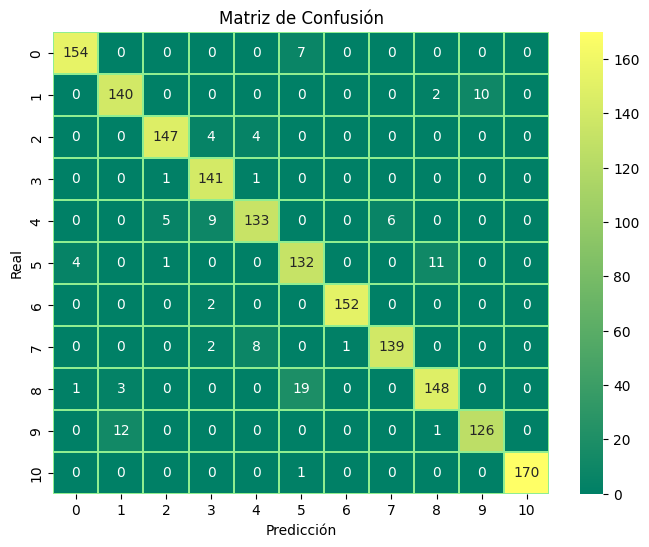

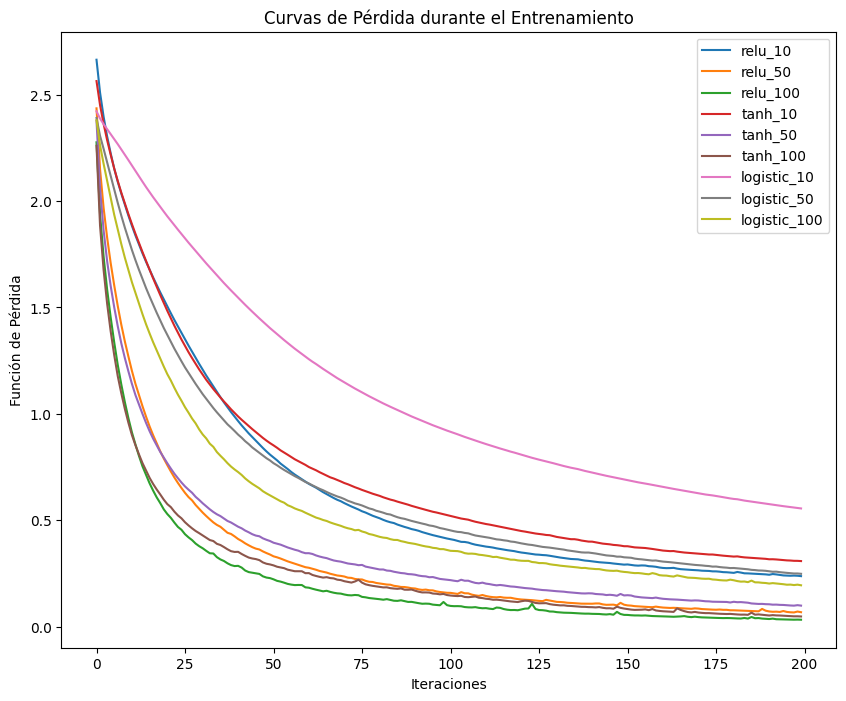

In [ ]:
# Definir las listas de funciones de activación y tamaños de capa oculta
activaciones = ['relu', 'tanh', 'logistic']
tamaños_capa = [10, 50, 100]


# Para almacenar las curvas de pérdida
loss_curves = {}

for activacion in activaciones:
    for tamaño in tamaños_capa:
        # Definir el MLP con los parámetros actuales
        mlp = MLPClassifier(hidden_layer_sizes=(tamaño,), activation=activacion, max_iter=200, random_state=42)

        # Entrenar el modelo
        mlp.fit(X_train_scaled, y_train)

        # Calcular la curva de pérdidas
        loss_curves[f'{activacion}_{tamaño}'] = mlp.loss_curve_

        # Predecir en el conjunto de prueba
        y_pred = mlp.predict(X_test_scaled)

        # Evaluar usando la función evaluar_clasificador
        print(f"Entrenando MLP con activación {activacion} y tamaño de capa oculta {tamaño}...")
        evaluar_clasificador(y_test, y_pred)
        #Generamos el reporte del accuracy para el análisis final
        accmlp = accuracy_score(y_test, y_pred)




plt.figure(figsize=(10, 8))

for key, loss_curve in loss_curves.items():
    plt.plot(loss_curve, label=key)

plt.xlabel('Iteraciones')
plt.ylabel('Función de Pérdida')
plt.title('Curvas de Pérdida durante el Entrenamiento')
plt.legend()
plt.show()

Analice los resultados obtenidos del grafico de la funcion de perdida (loss) vs numero de iteraciones de las diferentes configuraciones, responda:

**¿Cual configuracion converge mas rapido y cual converge mas lento?**

La configuración que converge más rapido es **Relu con 100 capas ocultas**, pero también podemos notar un resultado similar al del tahn con 100 capas ocultas, durante las primeras iteraciones en el modelo.

La configuración que converge más lento y notablemente, es **logistic con 10 capas ocultas**, cabe destacar eso sí, que esta configuración no fue la que empieza con la peor perdida durante la primera iteración.


**¿Cual configuracion obtuvo la perdida mas baja en la ultima iteracion (iter 200)?**

La configuración con la función de perdida más baja en la iteración 200, fue **Relu con 100 capas ocultas.**

Analice los resultados obtenidos del reporte de clasificacion y de la matriz de confusion, responda:

**¿Cual configuracion obtuvo el mayor Accuracy?**

La configuración que presenta un mayor Accuracy fue **tahn con 100 capas ocultas** con un 0.97, la cual vista en el gráfico de la curva de perdida, esta fue la segunda con una perdida más baja.


**¿Cual configuracion obtuvo el menor Accuracy?**

La configuración que presenta un menor Accuracy, fue **logistic con 10 capas ocultas** con 0.85, la cual vista en la curva, esta si es notablemente la con mayor perdida de todas las configuraciones presentadas.


**¿Que conclusiones puede obtener de las matrices de confusion? ¿Se ha hecho una buena clasificacion?**

Al analizar cada matriz de confusión podemos darnos cuenta que en todas las configuraciones se presenta el siguiente caso; la clase 2 se identifica como si fuera de la clase 10, dandonos unos falsos positivos, pero con valores muy diminitos. Por lo tanto, podemos decir que se ha hecho una buena clasificación de todas las clases.


Para cada funcion de activacion ['relu', 'tanh', 'logistic'] responda: **¿Que efectos tuvo aumentar la cantidad de neuronas en la capa oculta?**

Con más capas, la red tiene la capacidad de captar patrones más complejos y abstractos en los datos. Y por lo mismo, es posible que tenga una mejor represantación de los datos. En cada función de activación al momento de aumentar las capas de 10 a 50, hubo una menor perdida, vista en el gráfico de la curva, esto también sucedió al aumentar las capas de 50 a 100.

Posibles desventajas de aumentar las capas, es claramente el costo computacional, más capas significa más pesos, y esto significan más cálculos. Por lo tanto, necesitamos de una buena fuente de memoria si queremos aumentar aún más estas capas ocultas.

## Parte 3: Reduccion de Dimensionalidad (PCA)
1. Utiliza la clase PCA de la biblioteca sklearn.decomposition para realizar la reducción de dimensionalidad mediante Análisis de Componentes Principales (PCA).
2. Define `n_components = 10`
3. Ajusta el modelo PCA utilizando el conjunto de entrenamiento (X_train).
4. Transforma los conjuntos de datos de entrenamiento y prueba (X_train y X_test) utilizando las componentes principales obtenidas.
5. Vuelve a entrenar los modelos Gaussianos, Random Forest y el mejor modelo MLP utilizando los nuevos conjuntos de datos de entrenamiento y evalúalos en los conjuntos de prueba correspondientes (X_test, y_test) obtenidos luego de aplicar PCA a los datos originales.
6. Registra el accuracy para cada modelo en el nuevo conjunto de caracteristicas reducidas.
7. Analice el efecto de aplicar PCA comparando los resultados obtenidos al aplicar esta tecnica con los modelos originales de la seccion 2, responda:
    - ¿Qué impacto tienen estas técnicas en el rendimiento de los modelos?
    - ¿Se observan mejoras significativas en comparación con los resultados anteriores o se observan desempeño mas bajos? ¿Por que ocurre esto?


## **ACCURACY CON PCA**

In [ ]:
# Definimos PCA con n_components=10
pca = PCA(n_components=10)

# Ajustando el modelo PCA en el conjunto de entrenamiento
pca.fit(X_train_scaled)

# Transformando los conjuntos de datos de entrenamiento y prueba
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenando modelos con los datos reducidos de PCA
#Modelo de Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
y_pred_gnb = gnb.predict(X_test_pca)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Accuracy del Naive Bayes: {accuracy_gnb:.4f}')

#Modelo de Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy del Random Forest: {accuracy_rf:.4f}')

#Modelo Perceptron Multicapa (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu')
mlp.fit(X_train_pca, y_train)
y_pred_mlp = mlp.predict(X_test_pca)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy del MLP: {accuracy_mlp:.4f}')

Accuracy del Naive Bayes: 0.4207
Accuracy del Random Forest: 0.7372
Accuracy del MLP: 0.6665


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## **ACCURACY SIN PCA**

In [ ]:
print(f'Accuracy del Naive Bayes: {accgnb:.4f}')
print(f'Accuracy del Random Forest: {accrf:.4f}')
print(f'Accuracy del MLP: {accmlp:.4f}')

Accuracy del Naive Bayes: 0.7808
Accuracy del Random Forest: 0.8385
Accuracy del MLP: 0.9322


**¿Qué impacto tienen estas técnicas en el rendimiento de los modelos?**

Al aplicar **PCA** podemos notar un cambio drástico y notable en los reportes de accuracy de cada modelo, en **Naive Bayes** tenemos una perdida de 0.3606 en su rendimiento, siendo el modelo que se vió más afectado por esta reducción de dimensionalidad. En el caso de **MLP** se presenta una perdida de 0.2587 en su rendimiento, siendo menor que el de Naive Bayes pero cabe recordar que utilizamos el mejor modelo MLP que se nos generó. Y el modelo que nos dió una perdida menor de rendimiento fue el de **Random Forest** con un 0,1025, y el hecho de que haya sido el menor, pudo haber sido por el parámetro **n_estimators=1** que es utilizado en este modelo, explicado anteriormente.

**¿Se observan mejoras significativas en comparación con los resultados anteriores o se observan desempeño mas bajos? ¿Por que ocurre esto?**

No tenemos mejoras significativas. Al contrario, el desempeño de todos los modelos disminuyó notablemente después de aplicar PCA.

Una posible razón del porque el desempeño es mucho menor, es por la perdida de información al momento de aplicar **PCA**. Al reducir las dimensiones, información importante que los modelos utilizaban para hacer predicciones precisas pudo haber sido eliminada.

Otra razón posible, es que nuestro modelo antes de realizar el **PCA** ya nos había entregado resultados con los cual podiamos salir muy conformes con ellos. Entonces la reducción de dimensiones en este caso es totalmente innecesaria realizarla en un modelo que ya se encuentra optimizado.


En conclusión, al aplicar **PCA** podemos afectar negativamente el rendimiento. Pero eso es viendolo en este caso, cada dataset es distinto uno de otro, entonces no se pierde nada con intentar. Y sabemos perfectamente todos los beneficios que podemos tener al reducir dimensiones ya sea menor ruido, complejidad, que no se presenten sobreajustes de ciertas caracteristicas, etc.